In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
definition = 'max'
threshold = '0.33'

In [3]:
seasons = [
    'Summer',
    'Autumn',
    'Winter',
    'Spring'
]

data = []
data_dir = '/g/data/er8/users/cd3022/solar_drought/coincident_time_series/'
file_name = definition + '_' + threshold

for season in seasons:
    df = pd.read_pickle(data_dir + season + '_' + file_name + '.pkl')
    data.append(df)

DF = pd.concat(data)

In [4]:
total_pixels = 2_259_695
regional_pixels = 13_210

DF['national'] = DF['national'] / total_pixels
DF['regional'] = DF['regional'] / regional_pixels

In [5]:
DF.index = pd.to_datetime(DF.index, dayfirst=True, format='mixed')
DF = DF.sort_index(ascending=True)

In [10]:
type(DF.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
DF

,national,regional,regional_mean
date,,,
2019-06-01,0.072087,0.130886,1
2019-06-02,0.081643,0.083119,1
2019-06-03,0.041330,0.188191,1
2019-06-04,0.044539,0.093338,0
2019-06-05,0.058587,0.132097,1
...,...,...,...
2024-02-25,0.054179,0.079712,1
2024-02-26,0.013485,0.002801,0
2024-02-27,0.019262,0.225132,1


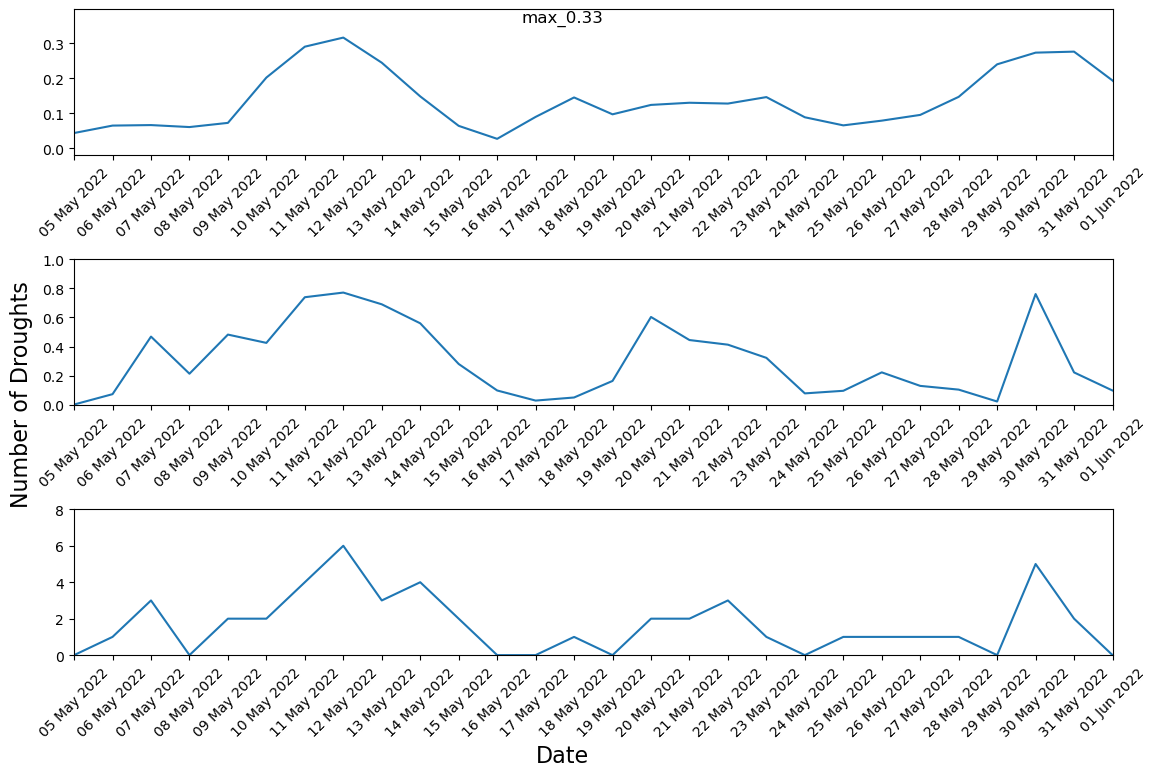

In [22]:
# Plot the data
fig, axes = plt.subplots(3, 1, figsize = (12,8))

for i, col in enumerate(DF.columns):
    ax = axes[i]
    ax.plot(DF[col])
    # Set x-ticks at 3-month intervals
    tick_range = pd.date_range(start=DF.index.min(), end=DF.index.max(), freq="1D")  # 3MS means 3-month start
    ax.set_xticks(tick_range)
    ax.set_xticklabels(tick_range.strftime("%d %b %Y"), rotation=45)

    # if col == 'national':
        # ax.set_ylim(0,0.4)
    if col == 'regional':
        ax.set_ylim(0,1)
    if col == 'regional_mean':
        ax.set_ylim(0,8)
    ax.set_xlim(pd.Timestamp('2022-05-05'), pd.Timestamp('2022-06-01'))

# Add labels and show plot

# Add global x and y labels
fig.text(0.5, 0.04, 'Date', ha='center', fontsize=16)  # x-label
fig.text(0.04, 0.5, 'Number of Droughts', va='center', rotation='vertical', fontsize=16)  # y-label


plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('/home/548/cd3022/figs/coincident_time_series/' + file_name + '.png')
plt.suptitle(file_name)
plt.show()